(20, 40)


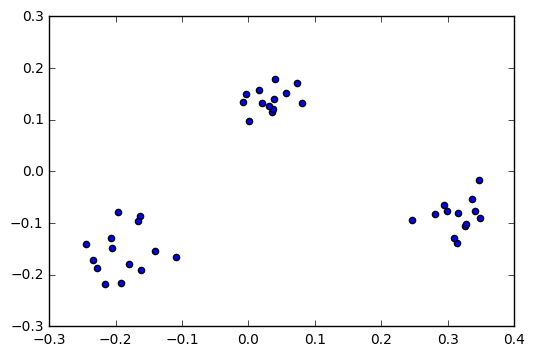

In [1]:
import scipy
from sklearn.preprocessing import normalize
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
#print randn(40,30)
#print scipy.sparse.rand(30,30,density=0.01)
D = 20
K = 40
X, _ = make_blobs(n_samples=K, centers=3, n_features=D)
X = X.T
#X = np.random.randn(D,K)
#X = np.array([[1, 3, 1, 3],[-1,-1,3,3],[3,3,3,1]]).T.astype(float)
normalize(X, norm='l2', axis=0, copy=False, return_norm=True)
#print X.T
np.savetxt('X_{}_{}'.format(D, K), X.T, delimiter=' ', fmt='%.5f')

print X.shape
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X[0,:], X[1,:])
plt.show()

In [2]:
r = 2000
beta = scipy.sparse.rand(K,r,density=0.2)
y = (X * beta)
np.savetxt('y_{}_{}'.format(D, r), y.T, delimiter=' ', fmt='%.5f')

## use learned dictionary to solve the sparse coding, and calculate the error

In [5]:
from sklearn.decomposition import sparse_encode
from sklearn.decomposition import DictionaryLearning, dict_learning_online
alpha = 0.5
#dl = DictionaryLearning(K, transform_algorithm='lars', alpha=alpha, transform_alpha=alpha, max_iter=500)
#dl.fit(y[:,:r/2].T)
#dictionary = dl.components_
#code = sparse_encode(y[:,r/2:].T, dictionary, algorithm='lars', alpha=0.5)
_, dictionary = dict_learning_online(y[:,:r/2].T, n_components=K, alpha=alpha, n_iter=500, dict_init=None, batch_size=1, shuffle=False, method='lars', inner_stats=None)
code = sparse_encode(y[:,r/2:].T, dictionary, algorithm='lars', alpha=0.5)
print code.shape
np.set_printoptions(precision=3, suppress=True)
print code

recovery = code.dot(dictionary)
print np.linalg.norm(recovery - y[:,r/2:].T)/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)
print "# nozero vector = ", sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)

(1000, 40)
[[ 0.     0.     0.    ...,  0.     0.     0.   ]
 [ 0.     0.    -2.198 ...,  0.     0.     0.983]
 [ 0.     0.     0.    ...,  0.866  0.     0.   ]
 ..., 
 [ 0.     0.    -2.964 ...,  0.     0.     0.   ]
 [ 0.478 -0.106  0.    ...,  0.     0.     0.   ]
 [ 0.     0.    -0.382 ...,  0.     0.     0.   ]]
0.0322930859717
# nozero vector =  1000


## use true dictionary

In [6]:
code = sparse_encode(y[:,r/2:].T, X.T, algorithm='lars', alpha=0.5)
recovery = code.dot(X.T)
print np.linalg.norm(recovery - y[:,r/2:].T)/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)

0.0606291698039


## use random dictionary

In [7]:
random_dict = np.random.randn(K, D)
code = sparse_encode(y[:,r/2:].T, random_dict, algorithm='lars', alpha=0.5)
recovery = code.dot(random_dict)
print np.linalg.norm(recovery - y[:,r/2:].T)/sum(np.linalg.norm(y[:,r/2:], axis=0) > 0)

0.0813078790736


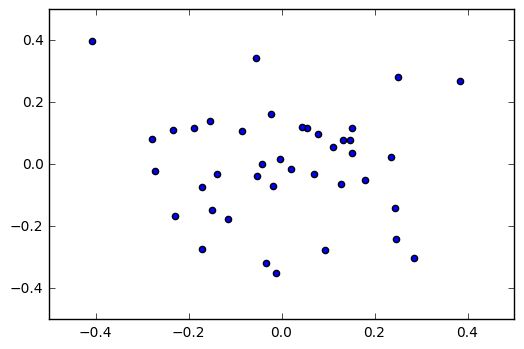

In [8]:
X = dictionary.T
plt.figure()
plt.scatter(X[0,:], X[1,:])
plt.show()